In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.8/883.8 kB 14.1 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import torch
import cv2
import matplotlib.pyplot as plt

# 1. Load YOLOv8 Model (choose 'yolov8n' for nano, 'yolov8s' for small, etc.)
model = YOLO('yolov8s.pt')  # YOLOv8 small pre-trained model


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 126MB/s]


In [3]:
def Image_read(img_path, show=False):
    img = cv2.imread(img_path)
    if img is None:
        print("Image not found. Please check the file path.")
    else:
        if show:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Display the image
            plt.figure(figsize=(10, 10))
            plt.imshow(img_rgb)
            plt.axis('off')  # Hide axes for a cleaner look
            plt.show()
        return img

In [4]:
# Display the Detection Results
def display_results(results):
    for result in results:
        # Use plot() to get the image with bounding boxes
        annotated_img = result.plot()

        # Convert the annotated image from BGR (OpenCV format) to RGB for displaying with matplotlib
        annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

        # Display using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(annotated_img_rgb)
        plt.axis('off')  # Hide axes for a cleaner look
        plt.show()


In [5]:
def evaluate_model():
    print("Evaluating model...")
    metrics = model.val()
    print("Precision:", metrics['precision'])
    print("Recall:", metrics['recall'])
    print("mAP 50:", metrics['map50'])
    print("mAP 50-95:", metrics['map'])

In [6]:
evaluate_model()

Evaluating model...
Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8s summary (fused): 168 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs

Dataset 'coco.yaml' images not found ⚠️, missing path '/content/datasets/coco/val2017.txt'


100%|██████████| 169M/169M [00:00<00:00, 255MB/s]
Unzipping /content/datasets/coco2017labels-segments.zip to /content/datasets/coco...: 100%|██████████| 122232/122232 [00:29<00:00, 4189.69file/s]

Dataset download success ✅ (1718.8s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 35.0MB/s]
val: Scanning /content/datasets/coco/labels/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:22<00:00, 224.99it/s]


val: New cache created: /content/datasets/coco/labels/val2017.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [57:22<00:00, 11.00s/it]


                   all       5000      36335      0.682      0.563      0.613      0.447
                person       2693      10777      0.789      0.716      0.794      0.573
               bicycle        149        314      0.708      0.449      0.566      0.342
                   car        535       1918      0.716      0.596      0.657      0.441
            motorcycle        159        367      0.773      0.651      0.733      0.479
              airplane         97        143      0.845      0.846      0.911      0.738
                   bus        189        283      0.813      0.754      0.818      0.701
                 train        157        190      0.835      0.847      0.891       0.69
                 truck        250        414      0.612      0.449      0.543      0.387
                  boat        121        424      0.637      0.409      0.475      0.266
         traffic light        191        634       0.73      0.451      0.524      0.275
          fire hydran

TypeError: 'DetMetrics' object is not subscriptable

In [11]:
def Detect_Object(path, conf=0.5):
    img = Image_read(path,show=True)
    results = model(img, conf=conf)
    display_results(results)

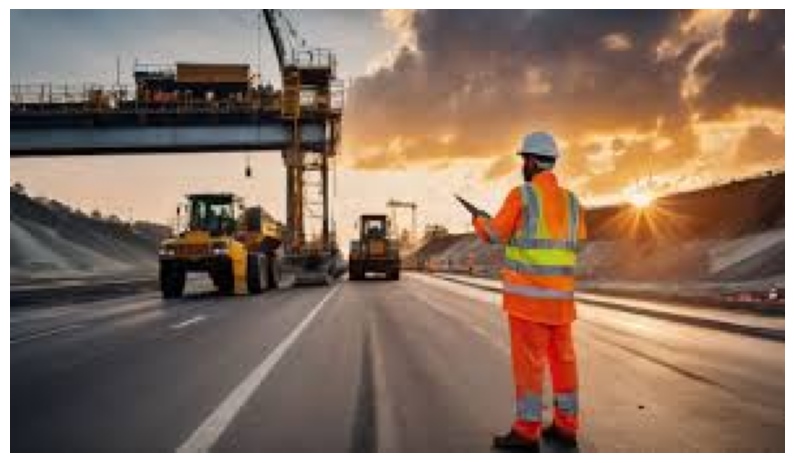


0: 384x640 1 person, 2 trucks, 445.9ms
Speed: 3.1ms preprocess, 445.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


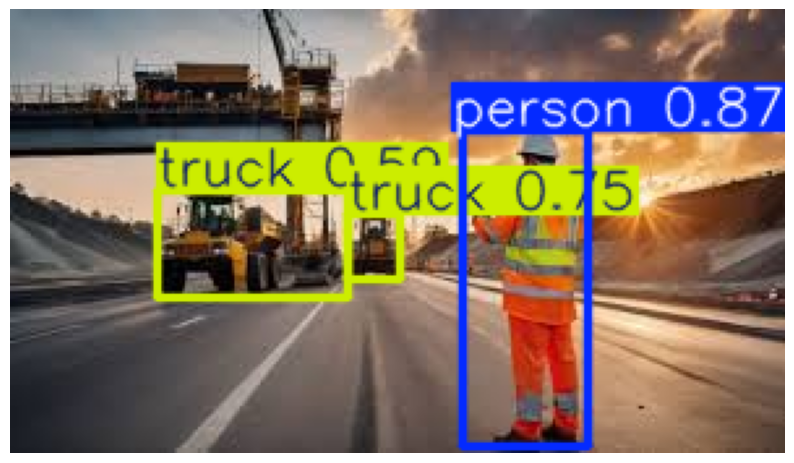

In [12]:
Detect_Object('/content/image2.jpg')